## Pymaceuticals Inc.

OBSERVED TREND 1: 
Capomulin has showed the best result in this test. The Tumor volumes reduced over time by 19%.

OBSERVED TREND 2: 
The Tumors all spread using four drugs but Capomulin and Infubinol showing the slower spread rate.

OBSERVED TREND 3:
90% mouse survived using Capomulin. The mouse survival rate using other three drugs are significantly lower.

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.axes_style('whitegrid')
sns.set_style('whitegrid')

In [298]:
#Read files
clinic="Pymaceuticals/raw_data/clinicaltrial_data.csv"
mouse="Pymaceuticals/raw_data/mouse_drug_data.csv"
clinic_pd = pd.read_csv(clinic)
mouse_pd = pd.read_csv(mouse)
#Merge two files
df = pd.merge(clinic_pd, mouse_pd, on=("Mouse ID"))

In [299]:
#select 4 drugs in the analyzed list
research_df=df.loc[df["Drug"].isin(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])]
#research_df.head()

In [300]:
mouse_id_list=research_df.loc[research_df.Timepoint == 45]["Mouse ID"].tolist()
#mouse_id_list

In [301]:
#find Mouse ID then data that survivied 45 days.
mouse_id_list=research_df.loc[research_df.Timepoint == 45]["Mouse ID"].tolist()
drug_timepoint_mouse=research_df.loc[research_df['Mouse ID'].isin(mouse_id_list)]
drug_timepoint_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [302]:
#generate a completed Tumor Volume(mm3) dataframe with 5 drogs and 45 days long data
indexed_df = drug_timepoint_mouse.set_index(['Drug','Timepoint'])
Tumor_Response=indexed_df['Tumor Volume (mm3)'].to_frame()
Tumor_Response

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   45.651331
          10                  43.270852
          15                  43.784893
          20                  42.731552
          25                  43.262145
          30                  40.605335
          35                  37.967644
          40                  38.379726
          45                  38.982878
Ketapril  0                   45.000000
          5                   49.470417
          10                  51.368862
          15                  56.184327
          20                  57.935912
          25                  59.548854
          30                  63.599610
          35                  67.211270
          40                  71.150835
          45                  74.104086
          0                   45.000000
          5                   49.048707
          10                  51.582162
          15                  53.675542
          20                  56.530204
          25                  62.108960
          30                  67.104537
          35                  67.873777
          40                  74.106091
          45                  75.294936
...                                 ...
Capomulin 0                   45.000000
          5                   42.261665
          10                  42.992077
          15                  43.529876
          20                  43.967895
          25                  44.596219
          30                  45.261384
          35                  45.941949
          40                  46.821070
          45                  47.685963
          0                   45.000000
          5                   45.622381
          10                  46.414518
          15                  39.804453
          20                  38.909349
          25                  37.695432
          30                  38.212479
          35                  32.562839
          40                  32.947615
          45                  33.329098
          0                   45.000000
          5                   41.408591
          10                  36.825367
          15                  35.464612
          20                  34.255732
          25                  33.118756
          30                  31.758275
          35                  30.834357
          40                  31.378045
          45                  28.430964

[520 rows x 1 columns]

In [303]:
#Find Avg response for each Drug
drug_timepoint_mouse_mean=drug_timepoint_mouse.groupby(['Drug','Timepoint'])\
                                             ["Tumor Volume (mm3)"].mean()

In [304]:
#UnStack the dataframe
drug_timepoint_mouse_mean=drug_timepoint_mouse_mean.unstack(level=0)
drug_timepoint_mouse_mean

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.638812,47.554028,47.989945,46.978130
10,43.288693,49.404738,50.135365,49.218669
15,42.241369,51.384368,53.000687,51.351923
20,41.046149,53.543237,55.563182,54.187082
25,39.719733,56.224678,58.728153,57.456515
30,38.803875,58.532347,62.169148,59.985903
35,37.772247,60.693045,64.310632,63.150796
40,36.958001,62.704291,67.081986,65.692814


In [305]:
tumor_response_error = drug_timepoint_mouse.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
tumor_response_error=tumor_response_error.unstack(level=0)
tumor_response_error

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.373530,0.400870,0.388425,0.334367
10,0.707142,0.483379,0.299887,0.547268
15,0.811862,0.630018,0.552425,0.790278
20,0.846435,0.866889,0.751238,0.992985
25,0.895478,0.942268,0.751584,1.184403
30,0.979400,0.977116,0.949917,1.283451
35,1.102608,1.069123,1.225594,1.213448
40,1.223608,1.062565,1.410349,1.327641


In [306]:
#Plot 

In [307]:
Capomulin_response = drug_timepoint_mouse_mean['Capomulin']
Infubinol_response = drug_timepoint_mouse_mean['Infubinol']
Ketapril_response = drug_timepoint_mouse_mean['Ketapril']
Placebo_response = drug_timepoint_mouse_mean['Placebo']

In [308]:
Capomulin_err = tumor_response_error['Capomulin']
Infubinol_err = tumor_response_error['Infubinol']
Ketapril_err = tumor_response_error['Ketapril']
Placebo_err = tumor_response_error['Placebo']

In [309]:
# Create a list of the time(days) that we will use as our x axis
days = drug_timepoint_mouse_mean.index
days

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

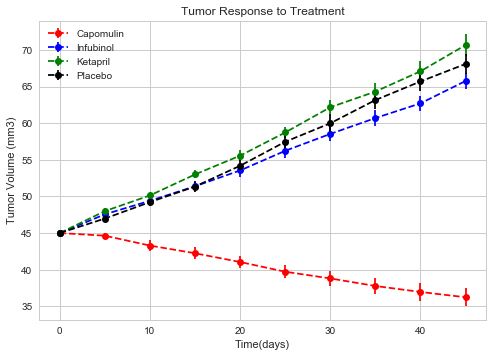

In [310]:
plt.errorbar(days, Capomulin_response, yerr=Capomulin_err, linestyle='--', marker='o', color="red")
plt.errorbar(days, Infubinol_response, yerr=Infubinol_err, linestyle='--', marker='o', color="blue")
plt.errorbar(days, Ketapril_response, yerr=Ketapril_err, linestyle='--', marker='o', color="green")
plt.errorbar(days, Placebo_response, yerr=Placebo_err, linestyle='--', marker='o', color="black")

plt.legend(loc="best")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time(days)")
plt.ylabel("Tumor Volume (mm3)")
# Print our chart to the screen
plt.show()

## Metastatic Response to Treatment

In [311]:
#drug_timepoint_mouse

In [312]:
#generate a completed Metastatic Sites dataframe with 5 drogs and 45 days long data
indexed_df = drug_timepoint_mouse.set_index(['Drug','Timepoint'])
Metastatic_Response=indexed_df['Metastatic Sites'].to_frame()
Metastatic_Response.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                         0
          5                         0
          10                        0
          15                        0
          20                        0

In [313]:
#Find Avg Metastatic Sites response for each Drug
drug_timepoint_mean=drug_timepoint_mouse.groupby(['Drug','Timepoint'])\
                                             ["Metastatic Sites"].mean()

In [314]:
#UnStack the dataframe
drug_timepoint_mean=drug_timepoint_mean.unstack(level=0)
drug_timepoint_mean

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.190476,0.111111,0.545455,0.545455
10,0.380952,0.666667,0.909091,0.909091
15,0.428571,0.666667,1.181818,1.454545
20,0.714286,0.666667,1.636364,1.909091
25,0.857143,0.777778,2.181818,2.272727
30,1.095238,1.333333,2.545455,2.545455
35,1.190476,1.555556,3.000000,2.909091
40,1.380952,1.888889,3.090909,3.090909


In [315]:
drug_timepoint_err=drug_timepoint_mouse.groupby(['Drug','Timepoint'])\
                                             ["Metastatic Sites"].sem()

In [316]:
drug_timepoint_err=drug_timepoint_err.unstack(level=0)
drug_timepoint_err

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.087805,0.111111,0.157459,0.157459
10,0.145997,0.235702,0.211254,0.162623
15,0.147542,0.235702,0.263480,0.281672
20,0.171031,0.235702,0.309625,0.314918
25,0.186263,0.277778,0.377026,0.304240
30,0.181328,0.166667,0.434085,0.312283
35,0.177537,0.242161,0.356753,0.342572
40,0.175610,0.260579,0.342572,0.314918


In [317]:
Capomulin_M_response = drug_timepoint_mean['Capomulin']
Infubinol_M_response = drug_timepoint_mean['Infubinol']
Ketapril_M_response = drug_timepoint_mean['Ketapril']
Placebo_M_response = drug_timepoint_mean['Placebo']
Capomulin_M_err = drug_timepoint_err['Capomulin']
Infubinol_M_err = drug_timepoint_err['Infubinol']
Ketapril_M_err = drug_timepoint_err['Ketapril']
Placebo_M_err = drug_timepoint_err['Placebo']

# Create a list of the time(days) that we will use as our x axis
days = drug_timepoint_mouse_mean.index

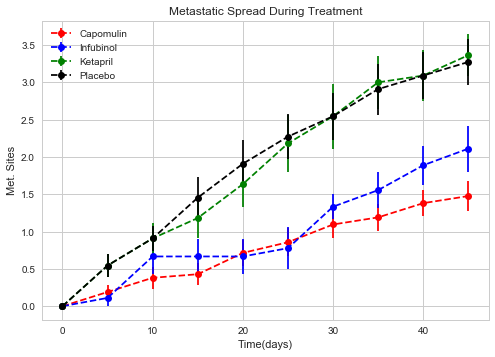

In [318]:
plt.errorbar(days, Capomulin_M_response, yerr=Capomulin_M_err, linestyle='--', marker='o', color="red")
plt.errorbar(days, Infubinol_M_response, yerr=Infubinol_M_err, linestyle='--', marker='o', color="blue")
plt.errorbar(days, Ketapril_M_response, yerr=Ketapril_M_err, linestyle='--', marker='o', color="green")
plt.errorbar(days, Placebo_M_response, yerr=Placebo_M_err, linestyle='--', marker='o', color="black")

plt.legend(loc=2)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time(days)")
plt.ylabel("Met. Sites")

# Print our chart to the screen
plt.show()

## Survival Rate

In [319]:
#research_df.head()

In [320]:
mouse_id_count=research_df.groupby(['Drug','Timepoint'])["Mouse ID"].count()

In [321]:
#UnStack the dataframe
mouse_id_count=mouse_id_count.unstack(level=0)
mouse_id_count

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


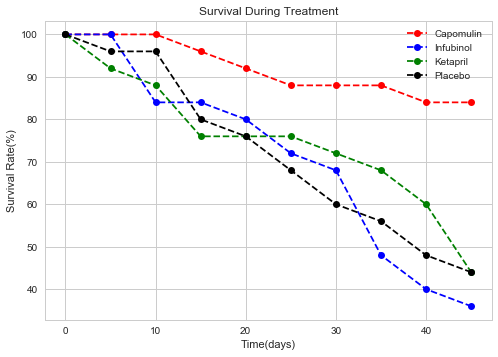

In [322]:
Capomulin_survival_rate =mouse_id_count['Capomulin']*100/25
Infubinol_survival_rate = mouse_id_count['Infubinol']*100/25
Ketapril_survival_rate = mouse_id_count['Ketapril']*100/25
Placebo_survival_rate = mouse_id_count['Placebo']*100/25
# Create a list of the time(days) that we will use as our x axis
days = drug_timepoint_mouse_mean.index
plt.plot(days, Capomulin_survival_rate, linestyle='--', marker='o', color="red", label="Capomulin")
plt.plot(days, Infubinol_survival_rate, linestyle='--', marker='o', color="blue", label="Infubinol")
plt.plot(days, Ketapril_survival_rate, linestyle='--', marker='o', color="green", label="Ketapril")
plt.plot(days, Placebo_survival_rate, linestyle='--', marker='o', color="black", label="Placebo")

plt.legend(loc="best")

plt.title("Survival During Treatment")
plt.xlabel("Time(days)")
plt.ylabel("Survival Rate(%)")


# Print our chart to the screen
plt.show()

## Summary Bar Graph

In [323]:
#drug_timepoint_mouse_mean

In [324]:
vol_change = (drug_timepoint_mouse_mean.iloc[-1] - \
                    drug_timepoint_mouse_mean.iloc[0])*100/drug_timepoint_mouse_mean.iloc[0]
#vol_change.to_frame()

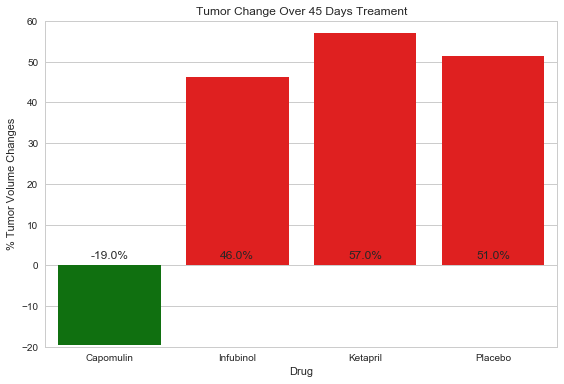

In [325]:
# Configure plot and ticks
plt.title("Tumor Change Over 45 Days Treament")
plt.ylabel("% Tumor Volume Changes")
plt.ylim(-20, 60)
x=vol_change.index
y=vol_change
colors = ['red' if _y >=0 else 'green' for _y in y]
ax = sns.barplot(x, y, palette=colors)

for n, (label, _y) in enumerate(zip(x, y)):   
    ax.annotate(
        s=(str(round(_y))+"%"),
        xy=(n, 0),
        ha='center',va='center',
        xytext=(0,10),
        textcoords='offset points',
    ) 

plt.tight_layout()
plt.show()